## Midterm 2 - MNIST Classification
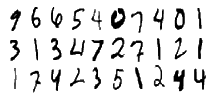
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/JRDKcotcXf5LZM3I3
#### Commit your code to github/bitbucket into folder midterm


In [8]:
from mnist import MNIST
import random

import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense

mndata = MNIST('.\\data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

The amount of train images 60000
The amount of test images 60000
The label of random image 8 The random image is 
............................
............................
............................
............................
............................
.................@@.........
.............@@@@@@.........
...........@@@@.............
.........@@@.....@@.........
.......@@@.......@@.........
.......@@........@..........
......@@@.......@@..........
.......@@@......@@..........
........@@@@@...@@..........
...........@@@@@@...........
.............@@@@...........
..............@@@...........
..............@@@@..........
..............@@.@..........
..............@@.@@.........
..............@..@@.........
.............@@..@..........
.............@@.@@..........
.............@@@@...........
..............@@............
............................
............................
............................
Images are binary with 28*28 =  784


In [9]:
Y = to_categorical(trlabels)
X = np.array(trimages)

seed = 7
np.random.seed(seed)

model = Sequential()
model.add(Dense(1024, input_dim=X.shape[1], init='uniform', activation='relu'))
model.add(Dense(512, init='uniform', activation='relu'))
model.add(Dense(256, init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(64, init='uniform', activation='relu'))
model.add(Dense(Y.shape[1], init='uniform', activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=30, batch_size=1000, verbose=2)

c:\users\ww\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, activation="relu", input_dim=784, kernel_initializer="uniform")`
  
c:\users\ww\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
c:\users\ww\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
c:\users\ww\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShe

Epoch 1/30
 - 41s - loss: 0.4736 - acc: 0.8562
Epoch 2/30
 - 28s - loss: 0.1047 - acc: 0.9681
Epoch 3/30
 - 27s - loss: 0.0643 - acc: 0.9798
Epoch 4/30
 - 30s - loss: 0.0387 - acc: 0.9881
Epoch 5/30
 - 27s - loss: 0.0271 - acc: 0.9915
Epoch 6/30
 - 32s - loss: 0.0249 - acc: 0.9916
Epoch 7/30
 - 28s - loss: 0.0160 - acc: 0.9952
Epoch 8/30
 - 29s - loss: 0.0118 - acc: 0.9962
Epoch 9/30
 - 26s - loss: 0.0150 - acc: 0.9953
Epoch 10/30
 - 26s - loss: 0.0167 - acc: 0.9944
Epoch 11/30
 - 29s - loss: 0.0126 - acc: 0.9957
Epoch 12/30
 - 27s - loss: 0.0104 - acc: 0.9966
Epoch 13/30
 - 26s - loss: 0.0109 - acc: 0.9963
Epoch 14/30
 - 25s - loss: 0.0100 - acc: 0.9966
Epoch 15/30
 - 25s - loss: 0.0120 - acc: 0.9965
Epoch 16/30
 - 27s - loss: 0.0114 - acc: 0.9964
Epoch 17/30
 - 27s - loss: 0.0073 - acc: 0.9977
Epoch 18/30
 - 29s - loss: 0.0084 - acc: 0.9976
Epoch 19/30
 - 25s - loss: 0.0047 - acc: 0.9985
Epoch 20/30
 - 29s - loss: 0.0078 - acc: 0.9975
Epoch 21/30
 - 28s - loss: 0.0052 - acc: 0.9983
E

In [13]:
print("accuracy for training data")
print(accuracy_score(model.predict_classes(X), np.array(trlabels)))

X1 = np.array(teimages)
print("accuracy for testing data")
print(accuracy_score(model.predict_classes(X1), np.array(telabels)))

accuracy for training data
0.999166666667
accuracy for testing data
0.983
